# **Data Cleaning Project: Credit Score Classification Datasets**

In this project, we will be doing some data cleaning and feature engineering to training and testing datasets about a credit score classification. The product of this project is a pair of csv files that can further be used in a prediction project to classify clients' credit score.

Our thanks to the provider of the original datasets:
https://www.kaggle.com/datasets/parisrohan/credit-score-classification

## **I. Project Preparation**

### Ia. Libraries

In [538]:
# importing libraries
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import sys
!{sys.executable} -m pip install termcolor

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

from termcolor import colored

### Ib. Datasets

In [396]:
# original train dan test datasets
train_ori = pd.read_csv('train.csv')
test_ori = pd.read_csv('test.csv')

# copy of train and test datasets
train = train_ori.copy()
test = test_ori.copy()

C:\Users\Arvy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Ic. Functions

In [397]:
# Function to get count of each unique value in a feature and its portion
def uniquevalueprob(dataset, feature, excludeditem = None):
    # Storing each unique value in a list
    global listUV
    listUV = list(dataset[feature].unique())
    listUV = [i for i in listUV if type(i) is not float]
    if excludeditem is not None:
        listUV.remove(excludeditem)
    else:
        listUV = listUV
    
    #Storing the count of each unique value in a list
    global listUVcount
    listUVcount = []
    for UV in listUV:
        UVcount = (dataset[feature] == UV).sum()
        listUVcount.append(UVcount)
    
    # Calculating the sum of all UVcount
    totalcount = sum(listUVcount)
    
    # Calculating the portion of each unique value in the feature
    global listUVportion
    listUVportion = []
    for item in listUVcount:
        UVportion = item / totalcount
        listUVportion.append(UVportion)
    
    # Creating the report table
    table = pd.DataFrame(list(zip(listUV, listUVcount, listUVportion)))
    table.columns = [feature, 'Count', 'Portion']
    
    # Displaying the report table
    print(table.sort_values(['Count', feature], 
                            ascending = [0,1]).to_string(index = False))

## **II. Light Data Exploration**

### IIa. General overview

There are some information regarding what each feature of the dataset represents given by the provider of the datasets. These information are very useful for us to better understand the datasets.

* 1. ID: Represents a unique identification of an entry
* 2. Customer_ID: Represents a unique identification of a person
* 3. Month: Represents the month of the year
* 4. Name: Represents the name of a person
* 5. Age: Represents the age of the person
* 6. SSN: Represents the social security number of a person
* 7. Occupation: Represents the occupation of the person
* 8. Annual_Income: Represents the annual income of the person
* 9. Monthly_Inhand_Salary:Represents the monthly base salary of a person
* 10. Num_Bank_Accounts: Represents the number of bank accounts a person holds
* 11. Num_Credit_Card: Represents the number of other credit cards held by a person
* 12. Interest_Rate: Represents the interest rate on credit card
* 13. Num_of_Loan: Represents the number of loans taken from the bank
* 14. Type_of_Loan: Represents the types of loan taken by a person
* 15. Delay_from_due_date: Represents the average number of days delayed from the payment date
* 16. Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
* 17. Changed_Credit_Limit: Represents the percentage change in credit card limit
* 18. Num_Credit_Inquiries: Represents the number of credit card inquiries
* 19. Credit_Mix: Represents the classification of the mix of credits
* 20. Outstanding_Debt: Represents the remaining debt to be paid (in USD)
* 21. Credit_Utilization_Ratio: Represents the utilization ratio of credit card
* 22. Credit_History_Age: Represents the age of credit history of the person
* 23. Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
* 24. Total_EMI_per_month: Represents the monthly EMI payments (in USD)
* 25. Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
* 26. Payment_Behaviour: Represents the payment behavior of the customer (in USD)
* 27. Monthly_Balance: Represents the monthly balance amount of the customer (in USD)

In [398]:
# train dataset

# first five rows of the dataset
pd.set_option('display.max_columns', None)
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [399]:
# train dataset

# dataset shape
print('train dataset entries x features :', train.shape)

train dataset entries x features : (100000, 28)


In [400]:
# train dataset

# data type info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [401]:
# categorical features in train dataset
trainCat = []
for i in train.columns:
    if train[i].dtype == 'object':
        trainCat.append(i)
trainCat

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [402]:
# numerical features in train dataset
trainNum = []
for i in train.columns:
    if train[i].dtype == 'float64':
        trainNum.append(i)
    if train[i].dtype == 'int64':
        trainNum.append(i)
trainNum

['Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month']

In [403]:
# test dataset

# first five rows of the dataset
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [404]:
# test dataset
# shape of the dataset
print('test dataset entries x features :', test.shape)

test dataset entries x features : (50000, 27)


In [405]:
# test dataset

# data type info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

### IIb. Missing values

In [406]:
# train dataset

# Calculating the missing values for each feature
MissingValues = train.isnull().sum()

# Turning the previous output into a dataframe format
MissingValues = pd.DataFrame(MissingValues)
MissingValues = MissingValues.reset_index()
MissingValues.columns = ['Feature', 'Count']

# Calculating each feature's missing values percentage
ListMissingVPerc = []
for i in MissingValues['Count']:
    missingperc = i/100000 * 100 # Total entries = 100000 (from previous step)
    ListMissingVPerc.append(missingperc)
ListMissingVPerc = [round(num, 2) for num in ListMissingVPerc]

# Adding the missing values percentage column to the report
MissingValues['Percentage (%)'] = ListMissingVPerc

# Printing the missing values report
print('Missing values on each feature (train) : ')
print(MissingValues.to_string(index = False))

Missing values on each feature (train) : 
                 Feature  Count  Percentage (%)
                      ID      0            0.00
             Customer_ID      0            0.00
                   Month      0            0.00
                    Name   9985            9.98
                     Age      0            0.00
                     SSN      0            0.00
              Occupation      0            0.00
           Annual_Income      0            0.00
   Monthly_Inhand_Salary  15002           15.00
       Num_Bank_Accounts      0            0.00
         Num_Credit_Card      0            0.00
           Interest_Rate      0            0.00
             Num_of_Loan      0            0.00
            Type_of_Loan  11408           11.41
     Delay_from_due_date      0            0.00
  Num_of_Delayed_Payment   7002            7.00
    Changed_Credit_Limit      0            0.00
    Num_Credit_Inquiries   1965            1.97
              Credit_Mix      0            0.0

In [407]:
# test dataset

# Calculating the missing values for each feature
MissingValues = test.isnull().sum()

# Turning the previous output into a dataframe format
MissingValues = pd.DataFrame(MissingValues)
MissingValues = MissingValues.reset_index()
MissingValues.columns = ['Feature', 'Count']

# Calculating each feature's missing values percentage
ListMissingVPerc = []
for i in MissingValues['Count']:
    missingperc = i/50000 * 100 # Total entries = 50000 (from previous step)
    ListMissingVPerc.append(missingperc)
ListMissingVPerc = [round(num, 2) for num in ListMissingVPerc]

# Adding the missing values percentage column to the report
MissingValues['Percentage (%)'] = ListMissingVPerc

# Printing the missing values report
print('Missing values on each feature (test) : ')
print(MissingValues.to_string(index = False))

Missing values on each feature (test) : 
                 Feature  Count  Percentage (%)
                      ID      0            0.00
             Customer_ID      0            0.00
                   Month      0            0.00
                    Name   5015           10.03
                     Age      0            0.00
                     SSN      0            0.00
              Occupation      0            0.00
           Annual_Income      0            0.00
   Monthly_Inhand_Salary   7498           15.00
       Num_Bank_Accounts      0            0.00
         Num_Credit_Card      0            0.00
           Interest_Rate      0            0.00
             Num_of_Loan      0            0.00
            Type_of_Loan   5704           11.41
     Delay_from_due_date      0            0.00
  Num_of_Delayed_Payment   3498            7.00
    Changed_Credit_Limit      0            0.00
    Num_Credit_Inquiries   1035            2.07
              Credit_Mix      0            0.00

### IIc. Duplicated entries

In [408]:
# train dataset

# duplicated entires
DuplicatedValues = train.duplicated().sum()
print('Duplicated data (train) : ' + str(DuplicatedValues))

Duplicated data (train) : 0


In [409]:
# test dataset

# duplicated entries
DuplicatedValues = test.duplicated().sum()
print('Duplicated data (test) : ' + str(DuplicatedValues))

Duplicated data (test) : 0


### IId. Unique values

In [410]:
# train Dataset

# Getting the feature names in a list
trainCols = list(train.columns.values)

# Calculating the number of each feature's unique values
ListUniqueC = []
for i in train.columns:
    UCount = len(train[i].unique())
    ListUniqueC.append(UCount)

# Creating the unique values table
UniqueCTable = pd.DataFrame(list(zip(trainCols, ListUniqueC)))
UniqueCTable.columns = ['Feature', 'Unique Values']

# Printing the report
print('Unique values in each feature (train):')
print(UniqueCTable.to_string(index = False))

Unique values in each feature (train):
                 Feature  Unique Values
                      ID         100000
             Customer_ID          12500
                   Month              8
                    Name          10140
                     Age           1788
                     SSN          12501
              Occupation             16
           Annual_Income          18940
   Monthly_Inhand_Salary          13236
       Num_Bank_Accounts            943
         Num_Credit_Card           1179
           Interest_Rate           1750
             Num_of_Loan            434
            Type_of_Loan           6261
     Delay_from_due_date             73
  Num_of_Delayed_Payment            750
    Changed_Credit_Limit           4384
    Num_Credit_Inquiries           1224
              Credit_Mix              4
        Outstanding_Debt          13178
Credit_Utilization_Ratio         100000
      Credit_History_Age            405
   Payment_of_Min_Amount              3
 

In [411]:
# test Dataset

# Getting the feature names in a list
testCols = list(test.columns.values)

# Calculating the number of each feature's unique values
ListUniqueC = []
for i in test.columns:
    UCount = len(test[i].unique())
    ListUniqueC.append(UCount)

# Creating the unique values table
UniqueCTable = pd.DataFrame(list(zip(testCols, ListUniqueC)))
UniqueCTable.columns = ['Feature', 'Unique Values']

# Printing the report
print('Unique values in each feature (test):')
print(UniqueCTable.to_string(index = False))

Unique values in each feature (test):
                 Feature  Unique Values
                      ID          50000
             Customer_ID          12500
                   Month              4
                    Name          10140
                     Age            976
                     SSN          12501
              Occupation             16
           Annual_Income          16121
   Monthly_Inhand_Salary          12794
       Num_Bank_Accounts            540
         Num_Credit_Card            819
           Interest_Rate            945
             Num_of_Loan            263
            Type_of_Loan           6261
     Delay_from_due_date             73
  Num_of_Delayed_Payment            444
    Changed_Credit_Limit           3927
    Num_Credit_Inquiries            751
              Credit_Mix              4
        Outstanding_Debt          12685
Credit_Utilization_Ratio          50000
      Credit_History_Age            400
   Payment_of_Min_Amount              3
  

### IIe. Findings

Some findings from the observations above:
<br>
<br>
1.   The shape of the train dataset is (10000 x 28), while the test dataset is (50000 x 27). The 1 difference in the number of feature between the train and test datasets is the 'Credit_Score' feature, which is the one needs to be learnt and predicted in the future by the machine learning models.
<br>
<br>
2.   There are some features which likely have wrong type of data type, both on the train and test datasets:
*   'Annual_Income' to float64
*   'Num_of_Loan' to int64
*   'Num_of_Delayed_Payment' to int64
*   'Changed_Credit_Limit' to float64
*   'Outstanding_Debt' to float64
*   'Credit_History_Age' to float64
*   'Amount_invested_monthly' to float64
*   'Monthly_Balance' to float 64
<br>
The data type of these features are currently in categorical type, while the data shown on the first five rows are numerical. We need to change this later.
<br>
<br>
3.  Missing values findings on each feature:


*   'Name'
*   'Monthly_Inhand_Salary'
*   'Type_of_Loan'
*   'Num_of_Delayed_Payment'
*   'Num_Credit_Inquiries'
*   'Credit_History_Age'
*   'Amount_invested_monthly'
*   'Monthly_Balance'
<br>
<br>
4. There are no duplicated entries in both train and test datasets.


## **III. Feature Engineering: Cleaning Data Type**

### IIIa. Categorical feature that are suppossed to be numerical

Let's first take a look at the categorical features that supposedly have numerical type of data instead.

In [412]:
# Categorical features that are supposedly to be numerical instead
FeaturesToConvert = ['Age',
                     'Annual_Income',
                     'Num_of_Loan',
                     'Num_of_Delayed_Payment',
                     'Changed_Credit_Limit',
                     'Outstanding_Debt',
                     'Amount_invested_monthly',
                     'Monthly_Balance'] 
# 'Credit_History_Age' feature will be dealt with later

# Checking the unique values of these features
for feature in FeaturesToConvert:
    uniques = train[feature].unique()
    print('Feature:', '\n',
          colored(feature, attrs = ['bold']), '\n',
          uniques, '\n',
          '--'*40, '\n')

Feature: 
 Age 
 ['23' '-500' '28_' ... '4808_' '2263' '1342'] 
 -------------------------------------------------------------------------------- 

Feature: 
 Annual_Income 
 ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_'] 
 -------------------------------------------------------------------------------- 

Feature: 
 Num_of_Loan 
 ['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1047' '1035' '1347_' '33' '193' '699' '329' '1451' '484' '132'
 '649' '995' '545' '684' '1135' '1094' '1204' '654' '58' '348' '614'
 '1363' '323' '1406' '1348' '430' '153' '1461' '905' '1312' '1424' '1154'
 '95' '1353' '1228' '819' '1006' '795' '359' '1209' '590

By looking at some of the entries above, one thing that could be noticed is that some of these entries contain non-numerical character, such as '-' and '_', while they are supposed to have only numerical character. We will omit both of these special characters from the features, and see if they can be converted into numerical features afterwards.

In [413]:
# Removing the '-' and '_' characters
for feature in FeaturesToConvert:
    train[feature] = train[feature].str.strip('-_')

# Handling the empty members in each feature
for feature in FeaturesToConvert:
    train[feature] = train[feature].replace({'':np.nan})

# Trying converting the categorical features into numerical type
for feature in FeaturesToConvert:
    train[feature] = train[feature].astype('float64')

# Checking if the conversion is successful
for feature in FeaturesToConvert:
    print(feature, '\n',
          train[feature].dtype)

Age 
 float64
Annual_Income 
 float64
Num_of_Loan 
 float64
Num_of_Delayed_Payment 
 float64
Changed_Credit_Limit 
 float64
Outstanding_Debt 
 float64
Amount_invested_monthly 
 float64
Monthly_Balance 
 float64


### IIIb. Credit_History_Age engineering

The data contained in this feature is meant to show a duration type of data, so for the sake of praticality when dealing with this data later in the analysis and prediction process, the type of data is better not be categorical, but numerical instead. Let's process the data contained in this feature.

In [414]:
# Taking a quick look again at the data
train['Credit_History_Age'].head()

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
Name: Credit_History_Age, dtype: object

Since the smallest unit is monthly, we are going to convert the data in monthly unit.

In [415]:
# Splitting each member of the 'Credit_History_Age' feature
SplitHistoryAge = [str(date).split(' ') for date in train['Credit_History_Age']]

# Getting the year
CreditYear = [item[0] for item in SplitHistoryAge]

# Converting the year to month
CreditYear = [float(x) * 12 for x in CreditYear]

# Getting the month
CreditMonth = []
for item in SplitHistoryAge:
    if len(item) > 1:
        CreditMonth.append(item[3]) # for non-nan member
    else:
        CreditMonth.append(item[0]) # for nan member

# Combining the year and month
CombinedCreditAge = [float(CreditYear[i]) + float(CreditMonth[i]) for i in range(len(CreditYear))]

# Assigning the combined month to the 'Credit_History_Age' feature
train['Credit_History_Age'] = CombinedCreditAge

# Checking the first five rows again
train['Credit_History_Age'].head()

0    265.0
1      NaN
2    267.0
3    268.0
4    269.0
Name: Credit_History_Age, dtype: float64

## **IV. Data Exploration 2: Categorical Features**

Now that the data type of each feature has been corrected, let us proceed to checking the cleanliness of each feature itself: data validation, spelling errors, missing values, outliers, feature addition or deletion (if needed).

In [416]:
# Rechecking the general overview of the train dataset after it has been previously modified
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

In [417]:
# Storing the categorical column name into a list
CatFeatures = []
for feature in train.columns:
    if train[feature].dtype == 'object':
        CatFeatures.append(feature)

# Storing the numerical column name into a list
NumFeatures = []
for feature in train.columns:
    if train[feature].dtype == 'float64' or train[feature].dtype == 'int64':
        NumFeatures.append(feature)

Checking the unique values of the categorical features

In [418]:
# Checking the unique values of the these features
for feature in CatFeatures:
    uniques = train[feature].unique()
    print('Feature:', '\n',
          colored(feature, attrs = ['bold']), '\n',
          uniques, '\n',
          'Unique values = ', len(train[feature].unique()), '\n',
          '--'*40, '\n')

Feature: 
 ID 
 ['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed'] 
 Unique values =  100000 
 -------------------------------------------------------------------------------- 

Feature: 
 Customer_ID 
 ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c'] 
 Unique values =  12500 
 -------------------------------------------------------------------------------- 

Feature: 
 Month 
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'] 
 Unique values =  8 
 -------------------------------------------------------------------------------- 

Feature: 
 Name 
 ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks'] 
 Unique values =  10140 
 -------------------------------------------------------------------------------- 

Feature: 
 SSN 
 ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990'] 
 Unique values =  12501 
 --------------------------------------------------

Findings:

*   Each customer data is presented in 8 months, from January to August. The correlation between the total members of the ID and Customer_ID features match up this information, with ID having 100000 members and Customer_ID having 12500 members.
*   The Name feature should have 12500 members as well, matching up to the value of the Customer_ID feature. The fact that the Name feature only consists of 10140 members might imply strongly that there are some of customer's names which completely miss from the dataset.
*   The SSN feature has 12501 members, with one member having a seemingly weird data validation compared to the other members in the feature, that is: '#F%$D@*&8'.
*   There are missing values in the Occupation feature, though not in the 'nan' format.
*   The Type_of_Loan feature appears to have list values. Formatting will be needed for this feature.
*   The Payment_Behavior also has a weird data validation compared to the other members in the feature, that is: '!@9#%8'
*   Including the Occupation and Credit_Mix features, after the data with weird data validation that exists in SSN and Payment_Behavior features has been deleted, these four features will have some missing values that need to be dealt with afterwards.

## **V. Feature Engineering: Data Cleaning**

### Va. Categorical Feature: Name

The Name feature usually has a purpose as a unique identifier for each entry in the dataset, in this case a unique identifier for each customer. However, since there are missing values in this column and the purpose of the feature overlaps with the Customer_ID feature anyway, the Name feature will be dropped instead.

In [419]:
# Dropping the Name feature
train.drop('Name', axis = 1, inplace = True)

### Vb. Categorical Feature: SSN

The '#F%$D@*&8' value will be dropped from the feature, as it contains an abnormal data validation compared to the other members in the feature.

In [420]:
# Dropping the '#F%$D@*&8' value from the SSN feature
train['SSN'] = train['SSN'].replace('#F%$D@*&8', np.nan)

The missing values now need to be filled in. SSN stands for Social Security Number, whose values are unique to each customer. Using this condition, we will be filling in the missing SSN values with the most frequently occuring method, with the Customer_ID feature as the reference.

In [421]:
# Filling in the missing values in SSN feature
train['SSN'] = train['SSN'].fillna(train.groupby('Customer_ID')['SSN'].transform(lambda x:x.mode().iat[0]))

### Vc. Categorical Feature: Occupation

Similar to the SSN feature, each value in the Occupation feature is also unique to each customer, assuming that the customers do not change occupation during the time period contained in the dataset. We cannot immediately fill in the missing values though, since the missing values are written as '_______' and not in 'nan'. We will drop the '_______', then fill in the missing Occupation value with the most frequent value occuring for each customer.

In [422]:
# Dropping the '_______' values
train['Occupation'] = train['Occupation'].replace('_______', np.NaN)

# Filling in the missing values in Occupation feature
train['Occupation'] = train['Occupation'].fillna(train.groupby('Customer_ID')['Occupation'].transform(lambda x:x.mode().iat[0]))

# Checking if there are still missing values
train['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

### Vd. Categorical Feature: Type_of_Loan

The type of data contained in the Type_of_Loan feature is actually list, though Python considers it as regular string instead. For this data cleaning process, the Type of Loan will be extended in each separated features, with the value in boolean type, plus a feature that has the value count of the Type_of_Loan of each customer. We will first try to clean the format of the string values of this feature.

In [423]:
# Checking how the data displays
print(train['Type_of_Loan'][0])
print(type(train['Type_of_Loan'][0]))

Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
<class 'str'>


In [424]:
# Converting every member of the feature as string (initially, the nan are categorized as float)
train['Type_of_Loan'] = train['Type_of_Loan'].astype('str')

# Dropping the 'and ' strings
train['Type_of_Loan'] = [item.replace('and ', '') for item in train['Type_of_Loan']]

In [425]:
# Dropping unuseful blank space
train['Type_of_Loan'] = [item.replace(', ', ',') for item in train['Type_of_Loan']]

# Splitting each item in the member of the feature by comma delimiter
train['Type_of_Loan'] = [item.split(',') for item in train['Type_of_Loan']]

In [426]:
# Checking if the data has been successfully formatted
print(train['Type_of_Loan'][0])
print(type(train['Type_of_Loan'][0]))

['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan']
<class 'list'>


Now, before we spread each unique value of Type_of_Loan as separate boolean features, we will be filling in the missing values based on the frequency of each unique value. 

In [455]:
# unique value counts (frequency) of each unique value
listUVcount = pd.Series([x for _list in train['Type_of_Loan'] for x in _list]).value_counts()
listUVcount

# Type_of_Loan unique values (excluding nan)
listUV = list(listUVcount[:-1].index)
listUV

# The sum of all unique values (excluding nan)
totalcount = sum(listUVcount[:-1])
totalcount

# Calculating the probabilities of each unique value
listUVportion = []
for UVcount in listUVcount[:-1]:
    UVportion = UVcount / totalcount
    listUVportion.append(UVportion)
listUVportion

# Creating the report table
table = pd.DataFrame(list(zip(listUV, listUVCount[:-1], listUVportion)))
table.columns = ['Type_of_Loan', 'Count', 'Portion']

# Report
table

,Type_of_Loan,Count,Portion
0,Payday Loan,40568,0.114830
1,Credit-Builder Loan,40440,0.114468
2,Not Specified,39616,0.112135
3,Home Equity Loan,39104,0.110686
4,Student Loan,38968,0.110301
5,Mortgage Loan,38936,0.110210
6,Personal Loan,38888,0.110075
7,Debt Consolidation Loan,38776,0.109757
8,Auto Loan,37992,0.107538


In [456]:
# Filling in the missing Type_of_Loan data
train['Type_of_Loan'] = train['Type_of_Loan'].fillna(pd.Series(np.random.choice(listUV,
                                                                                p = listUVportion,
                                                                                size = len(train['Type_of_Loan']))))

In [457]:
# Checking if there are still missing values in the Type_of_Loan feature
train['Type_of_Loan'].isnull().sum()

0

Now that the missing values are not present anymore, let us separate each Type_of_Loan into separate features

In [458]:
# Converting the list of list into a dataframe
df_Type_of_Loan = pd.DataFrame(mlb.fit_transform(train['Type_of_Loan']),columns=mlb.classes_).astype(bool)
df_Type_of_Loan

,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,nan
0,True,True,False,True,False,False,False,True,False,False
1,True,True,False,True,False,False,False,True,False,False
2,True,True,False,True,False,False,False,True,False,False
3,True,True,False,True,False,False,False,True,False,False
4,True,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
99995,True,False,False,False,False,False,False,False,True,False
99996,True,False,False,False,False,False,False,False,True,False
99997,True,False,False,False,False,False,False,False,True,False
99998,True,False,False,False,False,False,False,False,True,False


In [459]:
# Making sure the nan feature is empty
sum(df_Type_of_Loan['nan'] == 'True')

0

In [460]:
# Dropping the nan feature
df_Type_of_Loan.drop('nan', axis = 1, inplace = True)

In [461]:
# Combining the original dataset and the Type_of_Loan dataset
train2 = pd.concat([train, df_Type_of_Loan],
                  axis = 1,
                  ignore_index = False)

# Moving the Credit_Score feature to the end of the dataframe
temp1 = train2['Credit_Score'] # temporarily storing the Credit_Score feature
train2.drop('Credit_Score', axis = 1, inplace = True) # Dropping the feature
train2['Credit_Score'] = temp1 # Reinserting the Credit_Score feature

The Type_of_Loan feature itself for now will not be dropped. This feature will still be useful when we are going to engineer the Num_of_Loan feature in the numerical feature section. Num_of_Loan basically counts the Type_of_Loan each entry has and it will be easier to count directly from the Type_of_Loan feature.

### Ve. Categorical Feature: Payment_Behavior

The '!@9#%8' value will be dropped from the feature, as it contains an abnormal data validation compared to the other members in the feature.

In [462]:
# Checking how many '!@9#%8' Payment_Behaviour values there are
len(train2[train2['Payment_Behaviour'] == '!@9#%8'])

7600

In [463]:
# Dropping the '!@9#%8' value from the SSN feature
train2['Payment_Behaviour'] = train2['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [464]:
# Filling in the missing values in Payment_Behaviour feature
train2['Payment_Behaviour'] = train2['Payment_Behaviour'].fillna(train.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x:x.mode().iat[0]))

In [465]:
# Checking if there are still abnormal values
len(train2[train2['Payment_Behaviour'] == '!@9#%8'])

1736

Note that after the fillna process, there are still 1736 '!@9#%8' values. This is because some customers have at least two type of Payment_Behaviour with same value counts. However, considering that the number is now small compared to the initial 7600 value counts, we will fill in the remaining with probability instead, the same as when we did with Type_of_Loan.

In [466]:
# Counting the portion of each unique value, excluding '!@9#%8'
uniquevalueprob(train2, 'Payment_Behaviour', '!@9#%8')

               Payment_Behaviour  Count  Portion
  Low_spent_Small_value_payments  27489 0.279746
High_spent_Medium_value_payments  18911 0.192451
 High_spent_Large_value_payments  14911 0.151744
 Low_spent_Medium_value_payments  14414 0.146686
 High_spent_Small_value_payments  11771 0.119790
  Low_spent_Large_value_payments  10768 0.109582


In [491]:
# Dropping !@9#%8 values
train2['Payment_Behaviour'] = train2['Payment_Behaviour'].replace('!@9#%8', np.nan)

# Filling in the remaining missing values with the unique value probability
train2['Payment_Behaviour'] = train2['Payment_Behaviour'].fillna(pd.Series(np.random.choice(listUV,
                                                                                            p = listUVportion, 
                                                                                            size = len(train2['Payment_Behaviour']))))

# Checking if there are still abnormal values
len(train2[train2['Payment_Behaviour'] == '!@9#%8'])

0

### Vf. Categorical Feature: Credit_Mix

The 'Credit_Mix' feature also has missing values in the form of string, '_'. Like before, we are going to omit these '_' values first before filling in the missing values.

In [494]:
# Dropping the '_' value
train2['Credit_Mix'] = train2['Credit_Mix'].replace('_', np.nan)

# Counting the portion of each unique value
uniquevalueprob(train2, 'Credit_Mix')

Credit_Mix  Count  Portion
  Standard  45837  0.45837
      Good  30391  0.30391
       Bad  23772  0.23772


In [495]:
# Filling in the remaining missing values with the unique value probability
train2['Credit_Mix'] = train2['Credit_Mix'].fillna(pd.Series(np.random.choice(listUV,
                                                                              p = listUVportion, 
                                                                              size = len(train2))))

# Checking if there are still abnormal values
len(train2[train2['Credit_Mix'] == '_'])

0

## VI. Data Exploration 3: Numerical Features

Now that we are done with the categorical features, let us move on to the numerical ones. A slightly different approcah is needed as we are dealing with both continuous and discrete numbers.

In [551]:
# Numerical data overview
NumDesc = train2.describe()
NumDesc

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,90970.000000,100000.000000,95521.000000,9.713200e+04
mean,119.509700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,10.761960,21.068780,30.946268,10.465678,27.754251,1426.220376,32.285173,221.195405,1403.118217,637.412998,3.088580e+22
std,684.757313,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,61.789933,14.860104,226.028754,6.670732,193.177339,1155.129026,5.116875,99.741364,8306.041270,2043.319327,3.208492e+24
min,14.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,7.759665e-03
25%,25.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.350000,3.000000,566.072500,28.052567,144.000000,30.306660,74.534002,2.700037e+02
50%,34.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,219.000000,69.249473,135.925682,3.364770e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,302.000000,161.224249,265.731733,4.696852e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,404.000000,82331.000000,10000.000000,3.333333e+26


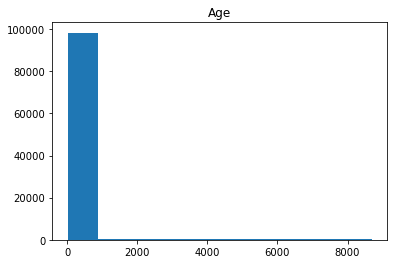

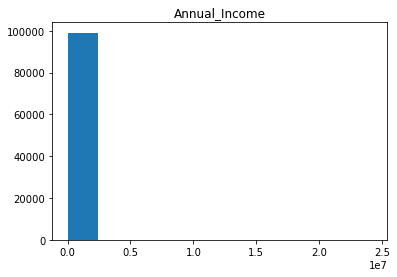

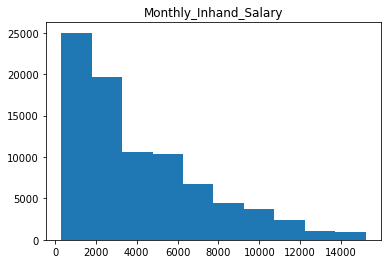

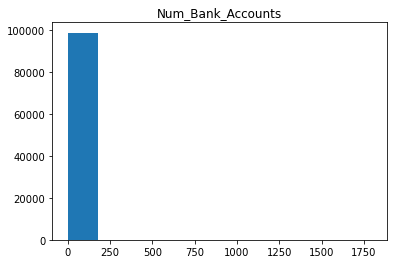

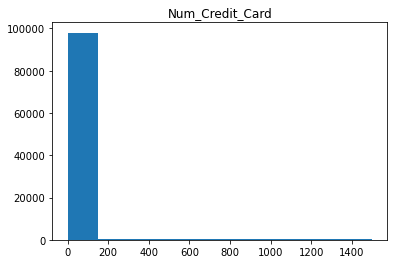

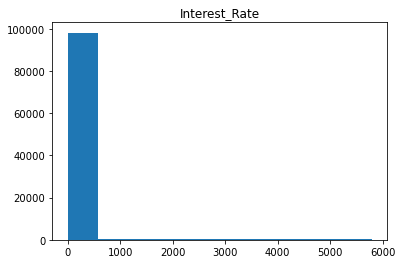

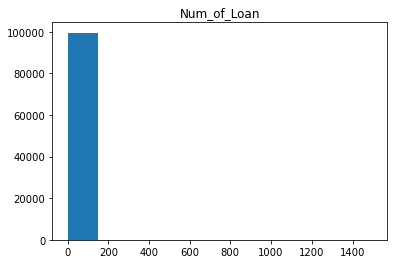

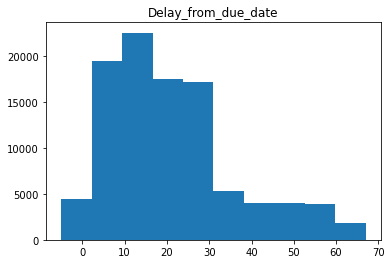

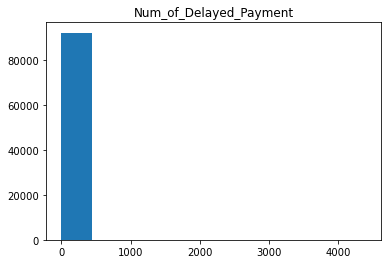

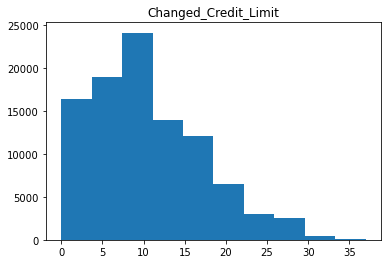

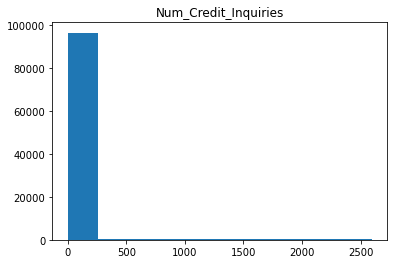

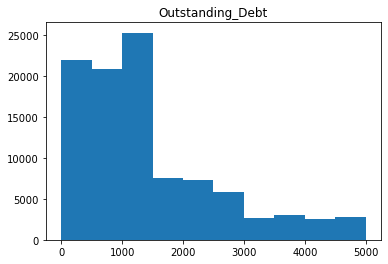

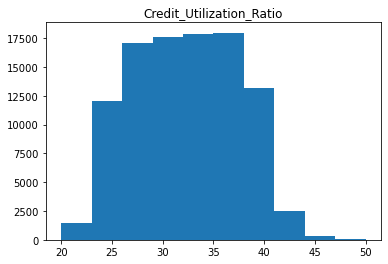

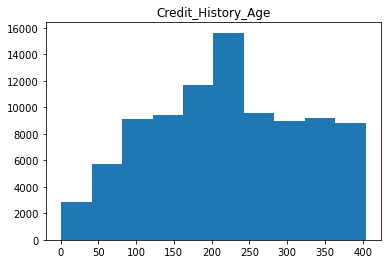

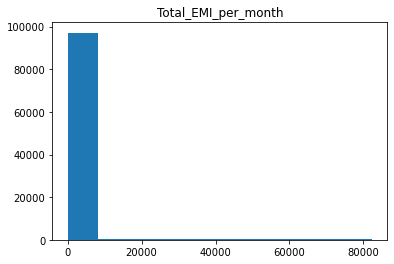

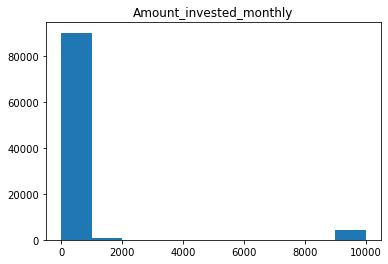

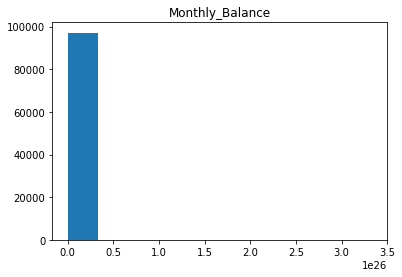

In [550]:
# Visualizing data distribution of each feature to spot outliers
for i in NumFeatures:
    plt.hist(train2[i])
    plt.title(i)
    plt.show()

Findings:
* 1. Monthly_Inhand_Salary, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_History_Age, and Amount_invested_monthly features (total: 6 features) have missing values.
* 2. Age, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Total_EMI_per_month, Amount_invested_monthly, Monthly_Balance features (total: 10 features) has abnormal max value (upper outlier). These outliers should be addressed when we are filling in the missing values using mean +- stddev imputation method
* 3. Continuing from the Type_of_Loan feature data cleaning, the Num_of_Loan feature will need to be updated with reference to the updated value in Type_of_Loan. The Type_of_Loan feature itself will be dropped afterwards.

Important numerical data cleaning note:
In the numerical features data cleaning process, there might be cases in which each one needs a different approach. The cases:
* 1. Missing value in an independent entry
* 2. Missing value in one or more members of an aggregated entries
* 3. Different value in one or more members of an aggregated entries
* 4. Totally missing values of an aggregated entries
<br>
<br>
For example, customer A has 8 entries in the dataset. The Age value of this customer is either supposed to be the same in all 8 entries or differ with +1 value in the forward entries (assuming he/she might have had a birthday during the period of the data collection). However, when we are looking at the dataset, the Age values of this customer's entries show that they either have missing values or varying values. This kind of case needs to be cleared.

# --(work still in progress, will be updated soon)--